In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
from proj1_helpers import *
from helpers2 import *

In [4]:
#data_folder = Path("../data/")
DATA_TRAIN_PATH = "../data/train.csv"
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Data analysis

In [99]:
print(y)
print(np.shape(y))
print(np.shape(tX))
print(tX.dtype)
print(y.dtype)

[ 1. -1. -1. ...  1. -1. -1.]
(250000,)
(250000, 30)
float64
float64


In [61]:
feature_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 
                 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 
                 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 
                 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 
                 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
                 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

for i, name in enumerate(feature_names):
    print(i, feature_names[i])


0 DER_mass_MMC
1 DER_mass_transverse_met_lep
2 DER_mass_vis
3 DER_pt_h
4 DER_deltaeta_jet_jet
5 DER_mass_jet_jet
6 DER_prodeta_jet_jet
7 DER_deltar_tau_lep
8 DER_pt_tot
9 DER_sum_pt
10 DER_pt_ratio_lep_tau
11 DER_met_phi_centrality
12 DER_lep_eta_centrality
13 PRI_tau_pt
14 PRI_tau_eta
15 PRI_tau_phi
16 PRI_lep_pt
17 PRI_lep_eta
18 PRI_lep_phi
19 PRI_met
20 PRI_met_phi
21 PRI_met_sumet
22 PRI_jet_num
23 PRI_jet_leading_pt
24 PRI_jet_leading_eta
25 PRI_jet_leading_phi
26 PRI_jet_subleading_pt
27 PRI_jet_subleading_eta
28 PRI_jet_subleading_phi
29 PRI_jet_all_pt


The training data set is composed of : 
* a y vector of length 250'000 and type float
* a tX float matrix of 250'000 rows and 30 columns

It means that our data set is composed of 250'000 different obsevations of 30 different features. In the rest of the notebook, we name the features by their index nummer. So, it means from the feature 0 from the feature  29.

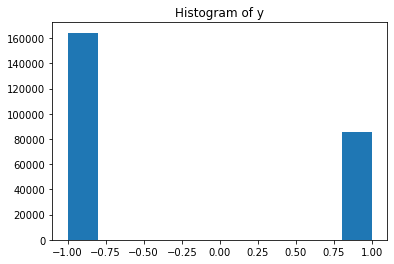

In [5]:
plt.hist(y)
plt.title('Histogram of y')
plt.show()

There is more y = -1 than y = 1 in the data, so there is more y = 'b' than y = 's'. So, we have to pay attention to normalize the data in order to compare them in the next plots.

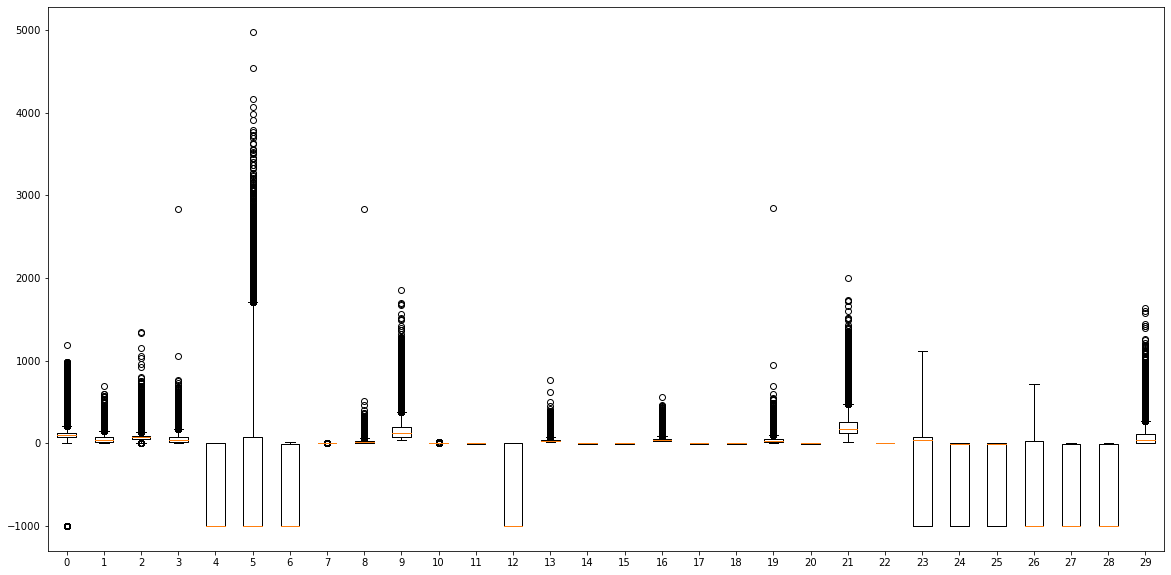

In [6]:
plt.figure(figsize=(20, 10))
ind = np.arange(30)
plt.boxplot(tX[:,], labels = ind)

plt.show()

There are many outliers depending on the feature. There are also feature that has a long interquantile range. Maybe we have to treat these feature in order to be more efficient in our futur predictions. Let's do more plots to be have a better idea :

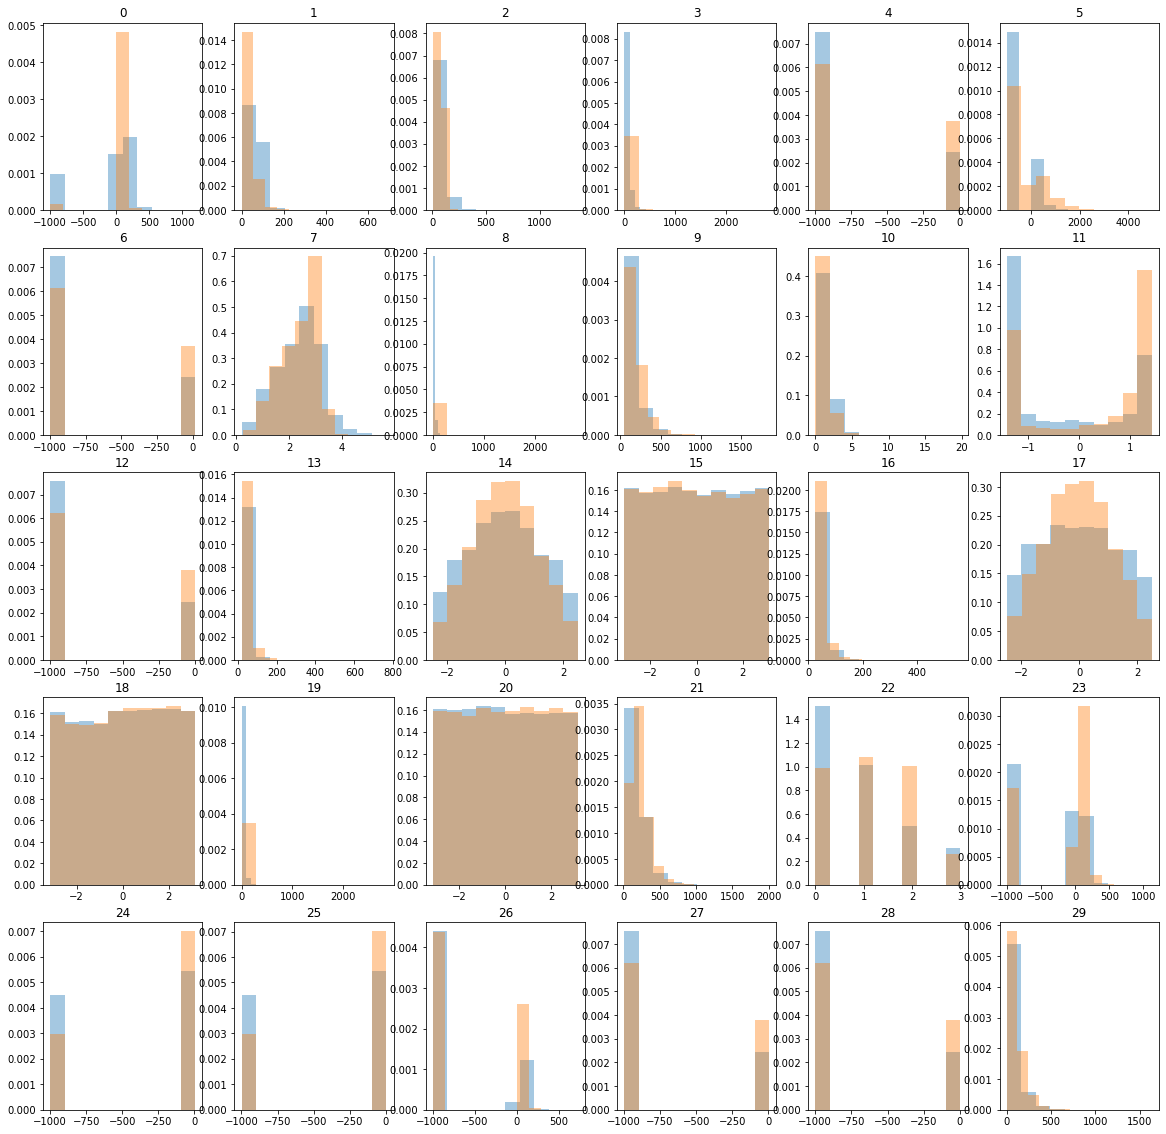

In [7]:
ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

fig, axs = plt.subplots(5, 6, figsize=(20,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].hist(tX_2[:,n], alpha=0.4, density=True, label=['y=-1', 'y=1'])
        axs[i,j].hist(tX_1[:,n], alpha=0.4, density=True)
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

By plotting the histograms of the features with a color for each y, we can see that there are useless features as they have almost the same distribution for y=1 than for y = -1. We can cut feature 15, 18, 20. 


There are also features that are very inequally distributed with value that are about -1000 and values around 0 ; it can be problematic for the prediction with such a large gap between values of a single distribution. Moreover, there is not a big difference in the distribution of y=1 and y=-1. Maybe it can be useful to put off these big negative values of these features. The features in question are : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.


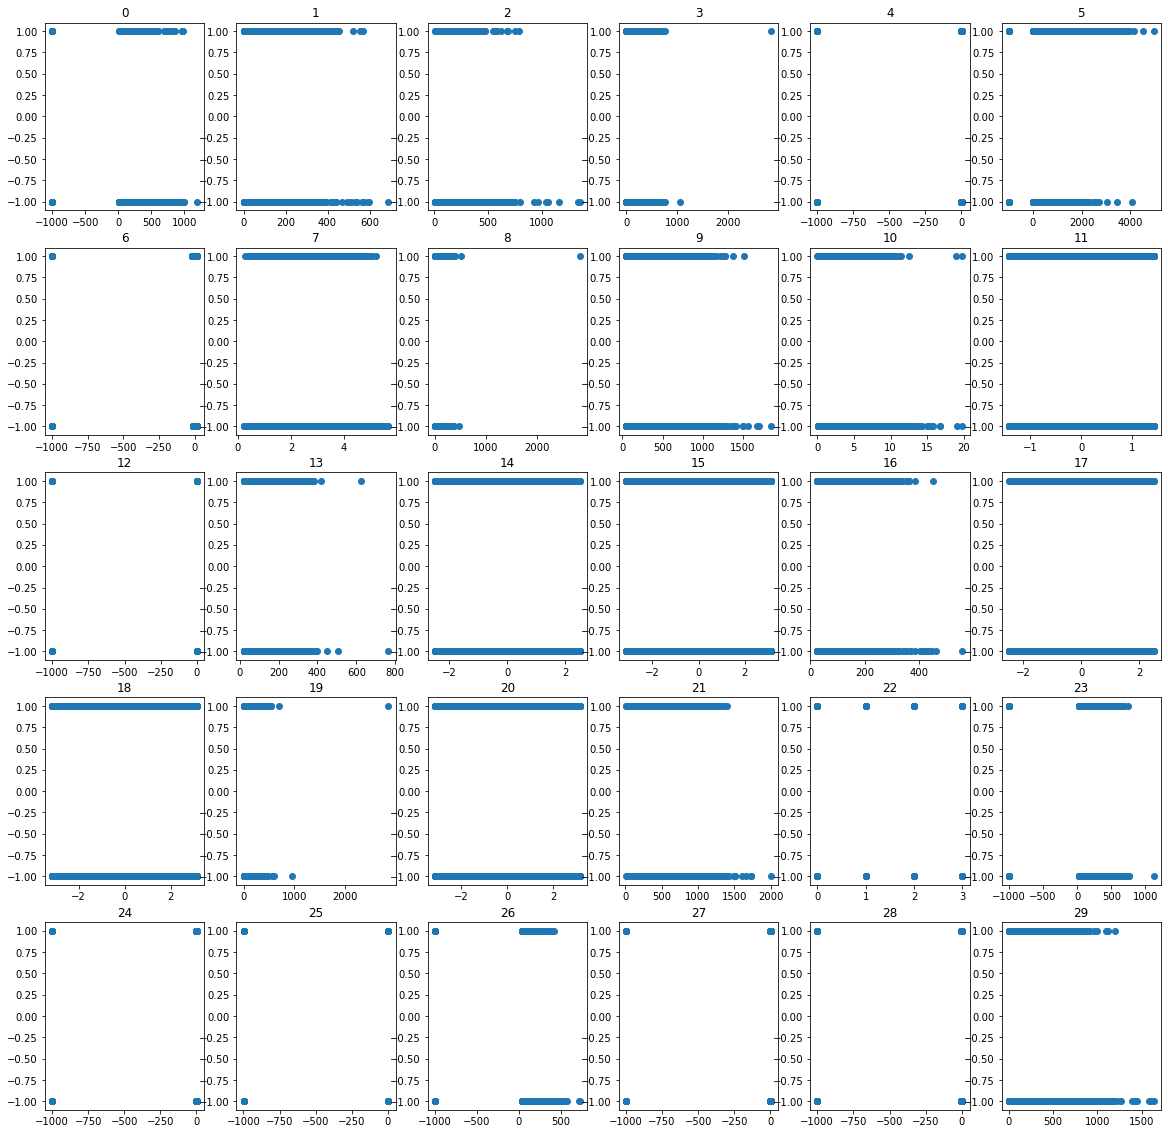

In [8]:
fig, axs = plt.subplots(5, 6, figsize=(20,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].scatter(tX[:,n], y)
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

#meme constat comment faire pour se debarrasser de ces valeurs ??

These plots confirm the obsevations that we made in the previous plot ; no difference of the distribution of y for features 15, 18, 20 and very large gap in the distributions of features : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.

## Data filtering

### Outliers

In [38]:
def nb_outliers(tX, outlier) : 
    sum = 0
    nb_outliers = []
    for col in range(tX.shape[1]) :
        sum = np.where(tX[:,col] == outlier)[0].shape
        nb_outliers.append(sum)   
    print(nb_outliers)
    print(np.where(tX==outlier)[0].shape)

out = -999

print('number of -999 in the entire matrix :')
nb_outliers(tX, out)

ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

print('number of -999 in the rows where y = 1 :')
nb_outliers(tX_1, out)
print('number of -999 in the rows where y = -1 :')
nb_outliers(tX_2, out)

number of -999 in the entire matrix :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)
number of -999 in the rows where y = 1 :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)
number of -999 in the rows where y = -1 :
[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]
(0,)


We have a problem with features  0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28. They are inequally distributed; they have a lot of -999 values and the rest is values around 0. So, here we can see how much of these -999 there are. We can see that the -999 appear only in the features that we identified with the histograms. It seems that there is a correlation between features as many features have the same number of -999. We can also see that there is more -999 in the obsevations where y=-1, so we have to take this into account when we filter the data. As there are many -999, we can't delete the rows where there is -999 because we will loose to much information.

### Mean and Standardization

In [5]:
# Changer par la valeur da la mean du feature en question sans les compter dedans
def filtering_with_mean(tX):
    index = [0,4,5,6,12,23,24,25,26,27,28]
    tX_filtered = np.copy(tX)
    arr = []
    for ind in index :
        arr = np.delete(tX_filtered[:,ind], np.where(tX_filtered[:,ind]==-999))
        mean = np.mean(arr)
        tX_filtered[np.where(tX_filtered[:,ind]==-999), ind] = mean
    return tX_filtered

In [7]:
def filtering_with_mean_bis(tX, y):
    #index = [0,4,5,6,12,23,24,25,26,27,28]
    index = np.arange(tX.shape[1])
    tX_filtered = np.copy(tX)
    
    ind_1 = np.where(y == 1)[0]
    ind_2 = np.where(y == -1)[0]
    tX_1 = tX[ind_1,:]
    tX_2 = tX[ind_2,:]
    
    ind_3 = np.where(tX[:,0]==-999)[0]
    new_ind_1 = np.intersect1d(ind_3, ind_1)
    new_ind_2 = np.intersect1d(ind_3, ind_2)
    
    arr_1 = []
    arr_2 = []
    for ind in index :
        arr_1 = np.delete(tX_1[:,ind], np.where(tX_1[:,ind]==-999))
        mean_1 = np.mean(arr_1)
        arr_2 = np.delete(tX_2[:,ind], np.where(tX_2[:,ind]==-999))
        mean_2 = np.mean(arr_2)
        tX_filtered[new_ind_1, ind] = mean_1
        tX_filtered[new_ind_2, ind] = mean_2
    return tX_filtered

In [60]:
def std(tX):
    mean = np.mean(tX, axis = 0)
    std = np.std(tX, axis = 0)
    tX[:, std>0] = (tX[:, std>0] - mean[std>0])/std[std>0]
    return tX

In order to filter the data, we want to get rif of these -999, but we can't just delete the rows. So, we have the idea to replace the -999 by the mean of the rest of values of the feature. As there is a significant difference of amount of -999 in between y=1 and y=-1 in certain features, we calculate the mean for the rows where y = 1 and y = -1 separatly.

Then, we can also standardize the data. It can be a good idea because the features are not all in the same range of values and it can create disproportionality between the importance of the features.

In [19]:
def log_distribution(tX, to_log):
    tX_log = np.copy(tX)
    index = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_log)):
            if index[i] == to_log[j]:
                tX_log[:, i] = np.log(1+tX[:, to_log[j]], where=np.all(tX[:, i]>0))  
    return tX_log

In [10]:
def separate_sets(tX, y, ids):
    index1 = np.where(tX[:, 22]==0)
    index2 = np.where(tX[:, 22]==1)
    index3 = np.where(tX[:, 22]>1)
    
    set1_x = tX[index1]
    set1_y = y[index1]
    set1_ids = ids[index1]
    
    set2_x = tX[index2]
    set2_y = y[index2]
    set2_ids = ids[index2]
    
    set3_x = tX[index3]
    set3_y = y[index3]
    set3_ids = ids[index3]
    
    return set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids

def concatenate_sets(set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids):
    tX = np.concatenate((set1_x, set2_x, set3_x), axis = 0)
    y = np.concatenate((set1_y, set2_y, set3_y), axis = 0)
    ids = np.concatenate((set1_ids, set2_ids, set3_ids), axis = 0)
    return tX, y, ids

In [11]:
def outliers(tX, outlier):
    outliers = []
    M = np.squeeze(tX.shape[0])
    for col in range(tX.shape[1]) :
        out_col = np.nonzero(tX[:,col] == outlier)[0].shape
        out_col = np.squeeze(out_col)
        outliers.append(out_col/M)
    print('outliers ratio for each feature', outliers)
    
    index_full = np.arange(tX.shape[1])
    index = index_full[~(outliers==np.ones(len(outliers)))]
    index = index.reshape(-1)
    X_without_outliers = tX[:, index]
    return X_without_outliers 

### Cutting features 

In [12]:
def cut(tX, to_cut):
    cut_index = 100*np.ones(tX.shape[1])
    index_full = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_cut)):
            if index_full[i] == to_cut[j]:
                cut_index[i] = to_cut[j]
    index = index_full[~(index_full == cut_index)]
    index = index.reshape(-1)
    tX_cut = tX[:, index]
    return tX_cut

def keep(tX, to_keep):
    keep_index = 100*np.ones(tX.shape[1])
    index_full = np.arange(tX.shape[1])
    for i in range(tX.shape[1]):
        for j in range(len(to_keep)):
            if index_full[i] == to_keep[j]:
                keep_index[i] = to_keep[j]
    index = index_full[index_full == keep_index]
    index = index.reshape(-1)
    tX_kept = tX[:, index]
    return tX_kept

As we see above in the histograms, some features seem to be useless as they have a similar distribution between the y = 1 and y = -1. So, it is useful to have function that cut or keep some parameters.

## Fonctions 

In [13]:
from implementations import *
from cross_validation import *

#### Feature engineering

In [14]:
tX_mean = filtering_with_mean_bis(tX, y)
tX_std = std(tX_mean)

to_cut = [15,18,20]
tX_mean_cut = cut(tX_std, to_cut)

to_cut1 = [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]
tX_cut = cut(tX_std, to_cut1)

to_keep = [13, 14, 17]
tX_kept = keep(tX_std, to_keep)

In [83]:
to_log = [1, 2, 5, 9, 10, 13, 16, 19, 21, 23, 26, 29]

set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX, y, ids)

print('Set 1')
set1_x = outliers(set1_x, -999)
set1_x = log_distribution(set1_x, to_log)
set1_x = filtering_with_mean_bis(set1_x, set1_y)
set1_x = std(set1_x)
_ = outliers(set1_x, -999)

print('\nSet 2')
set2_x = outliers(set2_x, -999)
#set2_x = log_distribution(set1_x, to_log)
set2_x = filtering_with_mean_bis(set2_x, set2_y)
set2_x = std(set1_x)
_ = outliers(set2_x, -999)

print('\nSet 3')
set3_x = outliers(set3_x, -999)
set3_x = log_distribution(set1_x, to_log)
set3_x = filtering_with_mean_bis(set1_x, set1_y)
set3_x = std(set1_x)
_ = outliers(set3_x, -999)

Set 1
outliers ratio for each feature [0.2614574679971575, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
outliers ratio for each feature [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Set 2
outliers ratio for each feature [0.09751882802022077, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
outliers ratio for each feature [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Set 3
outliers ratio for each feature [0.06105344416415092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

#### Choose x and generate test and train data 

In [94]:
x1 = tX_mean
x2 = tX_kept
x3 = tX_std
x4 = tX_mean_cut

### Least squares

Cross validation to get parameters

In [ ]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(y, tX_log, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX_poly = build_poly(tX_log, degree_opt)
w_ls, loss_ls = least_squares(y, tX_poly)
print("Least square loss {loss}".format(loss=loss_ls))
degree_ls = degree_opt

In [ ]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(set1_y, set1_x, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX_poly = build_poly(set1_x, degree_opt)
w_ls1, loss_ls1 = least_squares(set1_y, tX_poly)
print("Least square loss {loss}".format(loss=loss_ls1))
degree_ls1 = degree_opt

In [ ]:
#je commente sinon pas le bon w_ls pour la submission
""""w_ls, loss_ls = least_squares(y, x1)
print("Least square loss {loss}".format(loss=loss_ls))
w_ls, loss_ls = least_squares(y, build_poly(x1, 8))
print("Least square mse loss {loss} with degree 8".format(loss=loss_ls))
w_ls, loss_ls = least_squares(y, build_poly(x1, 8))
loss_ls = np.sqrt(2*loss_ls)
print("Least square rmse loss {loss} with degree 8".format(loss=loss_ls))"""

In [ ]:
np.random.seed(seed=1)
degrees = np.arange(1,11)
degree_opt, _ = best_degree_selection(y, x4, degrees, k_fold=4, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
tX2 = build_poly(x4, degree_opt)
w_ls2, loss_ls2 = least_squares(y, tX2)
print("Least square loss {loss}".format(loss=loss_ls))
degree_ls2 = degree_opt

### Ridge regression 

Cross validation to find the oprimal lambda and degree

In [ ]:
degrees = np.arange(1,11)
degree_opt, lambda_opt = best_degree_selection(y, x4, degrees, k_fold=4, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
tX = build_poly(x1, degree_opt)
w_rr, loss_rr = ridge_regression(y, tX, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr))
degree_rr = degree_opt

In [ ]:
degrees = np.arange(1,11)
degree_opt, lambda_opt = best_degree_selection(set1_y, set1_x, degrees, k_fold=10, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
tX_poly = build_poly(x1, degree_opt)
w_rr1, loss_rr1 = ridge_regression(set1_y, tX_poly, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr1))
degree_rr1 = degree_opt

### Gradient descent

CV to find best gamma

In [ ]:
k_fold = 10
max_iters = 500
initial_w = np.zeros(set1_x.shape[1])
gammas = np.arange(0, 3, 0.01)
#set2_x = np.c_[np.ones(set2_x.shape[0]), set2_x]
gamma_opt = cross_validation(set2_y, set2_x, k_fold, gammas, fonction=2)
w_gd, loss_gd = least_squares_GD(set2_y, set2_x, gamma_opt, max_iters=max_iters)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("Gradient descent regression loss {loss}".format(loss=loss_gd))

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5
Gradient Descent(2/49): loss=0.5
Gradient Descent(3/49): loss=0.5
Gradient Descent(4/49): loss=0.5
Gradient Descent(5/49): loss=0.5
Gradient Descent(6/49): loss=0.5
Gradient Descent(7/49): loss=0.5
Gradient Descent(8/49): loss=0.5
Gradient Descent(9/49): loss=0.5
Gradient Descent(10/49): loss=0.5
Gradient Descent(11/49): loss=0.5
Gradient Descent(12/49): loss=0.5
Gradient Descent(13/49): loss=0.5
Gradient Descent(14/49): loss=0.5
Gradient Descent(15/49): loss=0.5
Gradient Descent(16/49): loss=0.5
Gradient Descent(17/49): loss=0.5
Gradient Descent(18/49): loss=0.5
Gradient Descent(19/49): loss=0.5
Gradient Descent(20/49): loss=0.5
Gradient Descent(21/49): loss=0.5
Gradient Descent(22/49): loss=0.5
Gradient Descent(23/49): loss=0.5
Gradient Descent(24/49): loss=0.5
Gradient Descent(25/49): loss=0.5
Gradient Descent(26/49): loss=0.5
Gradient Descent(27/49): loss=0.5
Gradient Descent(28/49): loss=0.5
Gradient Descent(29/49):

Gradient Descent(10/49): loss=0.49998123249453336
Gradient Descent(11/49): loss=0.4999799958333747
Gradient Descent(12/49): loss=0.49997883429575984
Gradient Descent(13/49): loss=0.4999777412166854
Gradient Descent(14/49): loss=0.49997671066732036
Gradient Descent(15/49): loss=0.4999757373623435
Gradient Descent(16/49): loss=0.4999748165797833
Gradient Descent(17/49): loss=0.4999739440916176
Gradient Descent(18/49): loss=0.4999731161036326
Gradient Descent(19/49): loss=0.49997232920325596
Gradient Descent(20/49): loss=0.4999715803142615
Gradient Descent(21/49): loss=0.49997086665739526
Gradient Descent(22/49): loss=0.49997018571611107
Gradient Descent(23/49): loss=0.49996953520671467
Gradient Descent(24/49): loss=0.4999689130523149
Gradient Descent(25/49): loss=0.4999683173600673
Gradient Descent(26/49): loss=0.49996774640126257
Gradient Descent(27/49): loss=0.49996719859388
Gradient Descent(28/49): loss=0.49996667248727517
Gradient Descent(29/49): loss=0.4999661667487192
Gradient Desc

Gradient Descent(19/49): loss=0.49996224689235796
Gradient Descent(20/49): loss=0.49996155072298254
Gradient Descent(21/49): loss=0.4999608956650815
Gradient Descent(22/49): loss=0.4999602777736807
Gradient Descent(23/49): loss=0.4999596935796301
Gradient Descent(24/49): loss=0.49995914002122044
Gradient Descent(25/49): loss=0.4999586143875235
Gradient Descent(26/49): loss=0.49995811427108183
Gradient Descent(27/49): loss=0.49995763752811384
Gradient Descent(28/49): loss=0.4999571822448204
Gradient Descent(29/49): loss=0.49995674670868356
Gradient Descent(30/49): loss=0.4999563293838896
Gradient Descent(31/49): loss=0.4999559288901788
Gradient Descent(32/49): loss=0.4999555439845698
Gradient Descent(33/49): loss=0.49995517354550706
Gradient Descent(34/49): loss=0.4999548165590642
Gradient Descent(35/49): loss=0.49995447210690164
Gradient Descent(36/49): loss=0.4999541393557273
Gradient Descent(37/49): loss=0.49995381754805146
Gradient Descent(38/49): loss=0.4999535059940595
Gradient De

Gradient Descent(42/49): loss=0.49994020278537354
Gradient Descent(43/49): loss=0.49993990387259973
Gradient Descent(44/49): loss=0.4999396123043853
Gradient Descent(45/49): loss=0.49993932770700883
Gradient Descent(46/49): loss=0.4999390497345643
Gradient Descent(47/49): loss=0.49993877806640974
Gradient Descent(48/49): loss=0.4999385124048884
Gradient Descent(49/49): loss=0.49993825247329016
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4999924833722923
Gradient Descent(2/49): loss=0.4999866969217781
Gradient Descent(3/49): loss=0.49998211797241
Gradient Descent(4/49): loss=0.4999784047704166
Gradient Descent(5/49): loss=0.4999753292550781
Gradient Descent(6/49): loss=0.4999727357122043
Gradient Descent(7/49): loss=0.4999705151729138
Gradient Descent(8/49): loss=0.49996858942365385
Gradient Descent(9/49): loss=0.4999669009095448
Gradient Descent(10/49): loss=0.49996540627255115
Gradient Descent(11/49): loss=0.4999640721484703
Gradient Descent(12/49): loss=0.49996287

Gradient Descent(14/49): loss=0.499950977040665
Gradient Descent(15/49): loss=0.49995000600033274
Gradient Descent(16/49): loss=0.4999491072999792
Gradient Descent(17/49): loss=0.4999482716279543
Gradient Descent(18/49): loss=0.4999474912295977
Gradient Descent(19/49): loss=0.49994675959544793
Gradient Descent(20/49): loss=0.4999460712218968
Gradient Descent(21/49): loss=0.4999454214249186
Gradient Descent(22/49): loss=0.4999448061935068
Gradient Descent(23/49): loss=0.49994422207328165
Gradient Descent(24/49): loss=0.4999436660733126
Gradient Descent(25/49): loss=0.4999431355909701
Gradient Descent(26/49): loss=0.49994262835090575
Gradient Descent(27/49): loss=0.4999421423551734
Gradient Descent(28/49): loss=0.4999416758422051
Gradient Descent(29/49): loss=0.4999412272528611
Gradient Descent(30/49): loss=0.49994079520217233
Gradient Descent(31/49): loss=0.49994037845568595
Gradient Descent(32/49): loss=0.49993997590956085
Gradient Descent(33/49): loss=0.49993958657373205
Gradient Desc

Gradient Descent(4/49): loss=0.4999661210131757
Gradient Descent(5/49): loss=0.49996276381795934
Gradient Descent(6/49): loss=0.4999600239406237
Gradient Descent(7/49): loss=0.49995772211359807
Gradient Descent(8/49): loss=0.49995574800110054
Gradient Descent(9/49): loss=0.499954028033456
Gradient Descent(10/49): loss=0.4999525101810706
Gradient Descent(11/49): loss=0.49995115611333535
Gradient Descent(12/49): loss=0.4999499367782972
Gradient Descent(13/49): loss=0.4999488296956423
Gradient Descent(14/49): loss=0.49994781718590264
Gradient Descent(15/49): loss=0.49994688515550434
Gradient Descent(16/49): loss=0.4999460222351685
Gradient Descent(17/49): loss=0.499945219154549
Gradient Descent(18/49): loss=0.49994446828043687
Gradient Descent(19/49): loss=0.4999437632709681
Gradient Descent(20/49): loss=0.49994309881354265
Gradient Descent(21/49): loss=0.4999424704239629
Gradient Descent(22/49): loss=0.49994187429086107
Gradient Descent(23/49): loss=0.499941307153979
Gradient Descent(24/

Gradient Descent(25/49): loss=0.4999379324356612
Gradient Descent(26/49): loss=0.49993744202755025
Gradient Descent(27/49): loss=0.4999369705291479
Gradient Descent(28/49): loss=0.4999365164562375
Gradient Descent(29/49): loss=0.49993607850260224
Gradient Descent(30/49): loss=0.49993565551322655
Gradient Descent(31/49): loss=0.4999352464621272
Gradient Descent(32/49): loss=0.49993485043392544
Gradient Descent(33/49): loss=0.49993446660846047
Gradient Descent(34/49): loss=0.4999340942478901
Gradient Descent(35/49): loss=0.4999337326858325
Gradient Descent(36/49): loss=0.49993338131819043
Gradient Descent(37/49): loss=0.4999330395953721
Gradient Descent(38/49): loss=0.49993270701566617
Gradient Descent(39/49): loss=0.49993238311958593
Gradient Descent(40/49): loss=0.49993206748502006
Gradient Descent(41/49): loss=0.4999317597230607
Gradient Descent(42/49): loss=0.4999314594744038
Gradient Descent(43/49): loss=0.49993116640623064
Gradient Descent(44/49): loss=0.4999308802094973
Gradient D

Gradient Descent(40/49): loss=0.4999301369301005
Gradient Descent(41/49): loss=0.4999298305171236
Gradient Descent(42/49): loss=0.49992953177643074
Gradient Descent(43/49): loss=0.4999292403785546
Gradient Descent(44/49): loss=0.49992895601641485
Gradient Descent(45/49): loss=0.4999286784032095
Gradient Descent(46/49): loss=0.49992840727055715
Gradient Descent(47/49): loss=0.4999281423668607
Gradient Descent(48/49): loss=0.4999278834558556
Gradient Descent(49/49): loss=0.4999276303153205
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4999840703793402
Gradient Descent(2/49): loss=0.4999754003308128
Gradient Descent(3/49): loss=0.49996979187632906
Gradient Descent(4/49): loss=0.49996579674144337
Gradient Descent(5/49): loss=0.499962779085574
Gradient Descent(6/49): loss=0.49996040115318163
Gradient Descent(7/49): loss=0.4999584623277609
Gradient Descent(8/49): loss=0.49995683609513336
Gradient Descent(9/49): loss=0.4999554396896206
Gradient Descent(10/49): loss=0.4999542

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.49998225448419586
Gradient Descent(2/49): loss=0.499973355175261
Gradient Descent(3/49): loss=0.49996776232790036
Gradient Descent(4/49): loss=0.4999638473156916
Gradient Descent(5/49): loss=0.49996092444877716
Gradient Descent(6/49): loss=0.49995863411286345
Gradient Descent(7/49): loss=0.49995676794055494
Gradient Descent(8/49): loss=0.49995519887604783
Gradient Descent(9/49): loss=0.49995384647387586
Gradient Descent(10/49): loss=0.49995265797624555
Gradient Descent(11/49): loss=0.49995159755618707
Gradient Descent(12/49): loss=0.49995064004269946
Gradient Descent(13/49): loss=0.49994976717482104
Gradient Descent(14/49): loss=0.49994896531063737
Gradient Descent(15/49): loss=0.49994822398930894
Gradient Descent(16/49): loss=0.49994753500361616
Gradient Descent(17/49): loss=0.49994689178504814
Gradient Descent(18/49): loss=0.4999462889849592
Gradient Descent(19/49): loss=0.4999457221818964
Gradient Descent(20/49): loss=0

Gradient Descent(30/49): loss=0.4999399554034158
Gradient Descent(31/49): loss=0.49993964610739877
Gradient Descent(32/49): loss=0.49993934894788117
Gradient Descent(33/49): loss=0.4999390631475566
Gradient Descent(34/49): loss=0.49993878799522784
Gradient Descent(35/49): loss=0.4999385228386722
Gradient Descent(36/49): loss=0.49993826707848504
Gradient Descent(37/49): loss=0.499938020162732
Gradient Descent(38/49): loss=0.4999377815822807
Gradient Descent(39/49): loss=0.4999375508667028
Gradient Descent(40/49): loss=0.49993732758065984
Gradient Descent(41/49): loss=0.49993711132070373
Gradient Descent(42/49): loss=0.49993690171243105
Gradient Descent(43/49): loss=0.4999366984079455
Gradient Descent(44/49): loss=0.4999365010835861
Gradient Descent(45/49): loss=0.49993630943788686
Gradient Descent(46/49): loss=0.49993612318974345
Gradient Descent(47/49): loss=0.4999359420767558
Gradient Descent(48/49): loss=0.49993576585373145
Gradient Descent(49/49): loss=0.49993559429132856
Gradient D

Gradient Descent(44/49): loss=0.4999592444878916
Gradient Descent(45/49): loss=0.4999591838717706
Gradient Descent(46/49): loss=0.4999591250388434
Gradient Descent(47/49): loss=0.49995906789120853
Gradient Descent(48/49): loss=0.4999590123391301
Gradient Descent(49/49): loss=0.49995895830017073
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.49998615046434164
Gradient Descent(2/49): loss=0.4999789634461863
Gradient Descent(3/49): loss=0.4999743876207172
Gradient Descent(4/49): loss=0.49997109849788013
Gradient Descent(5/49): loss=0.49996852655335206
Gradient Descent(6/49): loss=0.4999664039316899
Gradient Descent(7/49): loss=0.4999645919225831
Gradient Descent(8/49): loss=0.4999630104445208
Gradient Descent(9/49): loss=0.4999616082607498
Gradient Descent(10/49): loss=0.49996034980333937
Gradient Descent(11/49): loss=0.49995920893357304
Gradient Descent(12/49): loss=0.49995816571252943
Gradient Descent(13/49): loss=0.49995720455626325
Gradient Descent(14/49): loss=0.4999

Gradient Descent(1/49): loss=0.4999851663532832
Gradient Descent(2/49): loss=0.4999778701929287
Gradient Descent(3/49): loss=0.4999733091528876
Gradient Descent(4/49): loss=0.49997003604895945
Gradient Descent(5/49): loss=0.499967467677408
Gradient Descent(6/49): loss=0.4999653426363674
Gradient Descent(7/49): loss=0.49996352743367417
Gradient Descent(8/49): loss=0.49996194399163485
Gradient Descent(9/49): loss=0.499960541234299
Gradient Descent(10/49): loss=0.4999592830749373
Gradient Descent(11/49): loss=0.4999581427640857
Gradient Descent(12/49): loss=0.4999570998784586
Gradient Descent(13/49): loss=0.49995613851949355
Gradient Descent(14/49): loss=0.49995524613543163
Gradient Descent(15/49): loss=0.4999544127040363
Gradient Descent(16/49): loss=0.4999536301439835
Gradient Descent(17/49): loss=0.4999528918807181
Gradient Descent(18/49): loss=0.4999521925209563
Gradient Descent(19/49): loss=0.49995152760559036
Gradient Descent(20/49): loss=0.49995089342017324
Gradient Descent(21/49):

Gradient Descent(26/49): loss=0.4999465493153711
Gradient Descent(27/49): loss=0.49994605997310465
Gradient Descent(28/49): loss=0.4999455862928763
Gradient Descent(29/49): loss=0.4999451273331757
Gradient Descent(30/49): loss=0.4999446822546177
Gradient Descent(31/49): loss=0.4999442503042676
Gradient Descent(32/49): loss=0.49994383080276217
Gradient Descent(33/49): loss=0.49994342313368206
Gradient Descent(34/49): loss=0.49994302673474544
Gradient Descent(35/49): loss=0.49994264109048714
Gradient Descent(36/49): loss=0.4999422657261438
Gradient Descent(37/49): loss=0.49994190020253293
Gradient Descent(38/49): loss=0.4999415441117429
Gradient Descent(39/49): loss=0.49994119707349716
Gradient Descent(40/49): loss=0.49994085873207
Gradient Descent(41/49): loss=0.49994052875366507
Gradient Descent(42/49): loss=0.4999402068241746
Gradient Descent(43/49): loss=0.4999398926472591
Gradient Descent(44/49): loss=0.499939585942692
Gradient Descent(45/49): loss=0.49993928644492847
Gradient Desce

Gradient Descent(13/49): loss=0.4999542469083029
Gradient Descent(14/49): loss=0.49995335004250435
Gradient Descent(15/49): loss=0.4999525105128605
Gradient Descent(16/49): loss=0.4999517204598133
Gradient Descent(17/49): loss=0.4999509735643193
Gradient Descent(18/49): loss=0.49995026469440296
Gradient Descent(19/49): loss=0.49994958964175246
Gradient Descent(20/49): loss=0.4999489449232795
Gradient Descent(21/49): loss=0.49994832763011027
Gradient Descent(22/49): loss=0.4999477353116028
Gradient Descent(23/49): loss=0.4999471658855006
Gradient Descent(24/49): loss=0.4999466175677848
Gradient Descent(25/49): loss=0.4999460888175077
Gradient Descent(26/49): loss=0.49994557829311803
Gradient Descent(27/49): loss=0.4999450848176722
Gradient Descent(28/49): loss=0.4999446073509616
Gradient Descent(29/49): loss=0.4999441449670647
Gradient Descent(30/49): loss=0.4999436968361745
Gradient Descent(31/49): loss=0.49994326220981783
Gradient Descent(32/49): loss=0.49994284040877673
Gradient Desc

Gradient Descent(48/49): loss=0.4999365364913705
Gradient Descent(49/49): loss=0.49993626862506113
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4999682713007207
Gradient Descent(2/49): loss=0.499958678002724
Gradient Descent(3/49): loss=0.49995309211997124
Gradient Descent(4/49): loss=0.49994925458972395
Gradient Descent(5/49): loss=0.4999463644704525
Gradient Descent(6/49): loss=0.4999440551445677
Gradient Descent(7/49): loss=0.49994213218178296
Gradient Descent(8/49): loss=0.4999404818450242
Gradient Descent(9/49): loss=0.4999390330783645
Gradient Descent(10/49): loss=0.4999377392813689
Gradient Descent(11/49): loss=0.49993656863583213
Gradient Descent(12/49): loss=0.49993549862029046
Gradient Descent(13/49): loss=0.49993451275827494
Gradient Descent(14/49): loss=0.4999335986260495
Gradient Descent(15/49): loss=0.49993274659767845
Gradient Descent(16/49): loss=0.49993194903403915
Gradient Descent(17/49): loss=0.4999311997454988
Gradient Descent(18/49): loss=0.49993

Gradient Descent(24/49): loss=0.4999261727042434
Gradient Descent(25/49): loss=0.4999256819328106
Gradient Descent(26/49): loss=0.4999252130805091
Gradient Descent(27/49): loss=0.4999247646784234
Gradient Descent(28/49): loss=0.4999243354058844
Gradient Descent(29/49): loss=0.49992392407022934
Gradient Descent(30/49): loss=0.49992352958992253
Gradient Descent(31/49): loss=0.4999231509803869
Gradient Descent(32/49): loss=0.49992278734204304
Gradient Descent(33/49): loss=0.4999224378501587
Gradient Descent(34/49): loss=0.49992210174619317
Gradient Descent(35/49): loss=0.4999217783303814
Gradient Descent(36/49): loss=0.4999214669553566
Gradient Descent(37/49): loss=0.49992116702063905
Gradient Descent(38/49): loss=0.49992087796785895
Gradient Descent(39/49): loss=0.4999205992765974
Gradient Descent(40/49): loss=0.49992033046075357
Gradient Descent(41/49): loss=0.49992007106536024
Gradient Descent(42/49): loss=0.49991982066378016
Gradient Descent(43/49): loss=0.4999195788552341
Gradient De

Gradient Descent(43/49): loss=0.4999189634726136
Gradient Descent(44/49): loss=0.49991873727997677
Gradient Descent(45/49): loss=0.4999185189662948
Gradient Descent(46/49): loss=0.49991830818686583
Gradient Descent(47/49): loss=0.4999181046159172
Gradient Descent(48/49): loss=0.49991790794520463
Gradient Descent(49/49): loss=0.4999177178827484
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4999710837835836
Gradient Descent(2/49): loss=0.49996194565861896
Gradient Descent(3/49): loss=0.49995722130868914
Gradient Descent(4/49): loss=0.4999540510195457
Gradient Descent(5/49): loss=0.49995164896554173
Gradient Descent(6/49): loss=0.4999497115016611
Gradient Descent(7/49): loss=0.49994808930103835
Gradient Descent(8/49): loss=0.49994669697494193
Gradient Descent(9/49): loss=0.4999454807335447
Gradient Descent(10/49): loss=0.4999444042798494
Gradient Descent(11/49): loss=0.4999434417887717
Gradient Descent(12/49): loss=0.49994257409416587
Gradient Descent(13/49): loss=0.4999

Gradient Descent(23/49): loss=0.4999360638361548
Gradient Descent(24/49): loss=0.49993570966679407
Gradient Descent(25/49): loss=0.4999353738909115
Gradient Descent(26/49): loss=0.4999350548670763
Gradient Descent(27/49): loss=0.4999347511518515
Gradient Descent(28/49): loss=0.4999344614714165
Gradient Descent(29/49): loss=0.4999341846978288
Gradient Descent(30/49): loss=0.4999339198290693
Gradient Descent(31/49): loss=0.4999336659721955
Gradient Descent(32/49): loss=0.49993342232905763
Gradient Descent(33/49): loss=0.49993318818414256
Gradient Descent(34/49): loss=0.4999329628941891
Gradient Descent(35/49): loss=0.4999327458792881
Gradient Descent(36/49): loss=0.4999325366152291
Gradient Descent(37/49): loss=0.4999323346268981
Gradient Descent(38/49): loss=0.4999321394825674
Gradient Descent(39/49): loss=0.4999319507889416
Gradient Descent(40/49): loss=0.49993176818684926
Gradient Descent(41/49): loss=0.4999315913474867
Gradient Descent(42/49): loss=0.4999314199691347
Gradient Descent

Gradient Descent(45/49): loss=0.4999174723516241
Gradient Descent(46/49): loss=0.49991727633088506
Gradient Descent(47/49): loss=0.49991708745015506
Gradient Descent(48/49): loss=0.4999169053859526
Gradient Descent(49/49): loss=0.49991672983213914
Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.4999698657592821
Gradient Descent(2/49): loss=0.4999605688949476
Gradient Descent(3/49): loss=0.4999558955971679
Gradient Descent(4/49): loss=0.4999527730584951
Gradient Descent(5/49): loss=0.49995040294844967
Gradient Descent(6/49): loss=0.4999484883924593
Gradient Descent(7/49): loss=0.49994688491991846
Gradient Descent(8/49): loss=0.49994550977921864
Gradient Descent(9/49): loss=0.49994431048269544
Gradient Descent(10/49): loss=0.4999432512696788
Gradient Descent(11/49): loss=0.4999423064277431
Gradient Descent(12/49): loss=0.49994145668819157
Gradient Descent(13/49): loss=0.4999406871451456
Gradient Descent(14/49): loss=0.49993998598399225
Gradient Descent(15/49): loss=0.4999

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.49996942915898757
Gradient Descent(2/49): loss=0.499960065246375
Gradient Descent(3/49): loss=0.49995534149174947
Gradient Descent(4/49): loss=0.4999522053911512
Gradient Descent(5/49): loss=0.4999498378171363
Gradient Descent(6/49): loss=0.4999479301844657
Gradient Descent(7/49): loss=0.4999463345674323
Gradient Descent(8/49): loss=0.49994496760069895
Gradient Descent(9/49): loss=0.49994377678156765
Gradient Descent(10/49): loss=0.49994272634029896
Gradient Descent(11/49): loss=0.49994179048094883
Gradient Descent(12/49): loss=0.4999409498080446
Gradient Descent(13/49): loss=0.4999401892819724
Gradient Descent(14/49): loss=0.49993949696950596
Gradient Descent(15/49): loss=0.49993886323585446
Gradient Descent(16/49): loss=0.49993828019621095
Gradient Descent(17/49): loss=0.49993774132791036
Gradient Descent(18/49): loss=0.4999372411868393
Gradient Descent(19/49): loss=0.4999367751944614
Gradient Descent(20/49): loss=0.4999

In [ ]:
k_fold = 10
initial_w = np.zeros(set1_x.shape[1])
gammas = np.arange(0, 3, 0.01)
gamma_opt = cross_validation(set1_y, set1_x, k_fold, gammas, fonction=2)
w_gd, loss_gd = least_squares_GD(set1_y, set1_x, gamma_opt, max_iters=max_iters)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("Gradient descent regression loss {loss}".format(loss=loss_gd))

### Stochastic gradient descent

cv for gamma

In [ ]:
k_fold = 10
gammas = np.arange(0, 3, 0.01)
gamma_opt = cross_validation(set1_y, set1_x, k_fold, gammas, fonction=2)
w_sgd, loss_sgd = least_squares_SGD(y, x2, gamma_opt, max_iters=500)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("Stochastic gradient descent regression loss {loss}".format(loss=loss_gd))

## Generate predictions and save ouput in csv format for submission:

In [64]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

tX_test1 = filtering_with_mean_bis(tX_test)

tX_test2 = keep(tX_test, to_keep)
tX_test2 = standardize(filtering_with_mean(tX_test))

tX_test3 = std(tX_test)

#### Least squares submissions

In [69]:
OUTPUT_PATH = '../data/pred_ls.csv' # TODO: fill in desired name of output file for submission
tX_test_ls = build_poly(tX_test1, degree_ls)
y_pred = predict_labels(w_ls, tX_test_ls)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
OUTPUT_PATH = '../data/pred_ls2.csv' # TODO: fill in desired name of output file for submission
tX_test_ls2 = cut(tX_test1, [15,18,20]) 
tX_test_ls2 = build_poly(tX_test_ls2, degree_ls2) 
y_pred = predict_labels(w_ls2, tX_test_ls2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

#### Ridge regression submissions

In [ ]:
OUTPUT_PATH = '../data/pred_rr.csv' # TODO: fill in desired name of output file for submission
tX_test_ls = build_poly(tX_test1, degree_rr)
y_pred = predict_labels(w_rr, tX_test1)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

#### Gradient descent submissions

In [96]:
OUTPUT_PATH = '../data/pred_sg.csv' # TODO: fill in desired name of output file for submission

y_pred = predict_labels(w_gd, tX_test2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: setting an array element with a sequence.

#### Stochastic gradient descent submissions

In [ ]:
OUTPUT_PATH = '../data/pred_sgd.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_sgd, tX_test2)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)